In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
from sklearn.linear_model import LogisticRegression
import sys

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
df_both_seasons_away = pd.read_pickle('df_both_seasons_essentials')

In [3]:
df_both_seasons_away.columns

Index(['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS',
       'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR',
       'HTGDIFF', 'ATGDIFF'],
      dtype='object')

## Add avg Away Team Goal Difference

In [4]:
df_both_seasons_away['AVGATGDIFF'] = 0
avg_per_team = {}
all_teams = df_both_seasons_away.AwayTeam.unique()
for t in all_teams:
    df_team = df_both_seasons_away[df_both_seasons_away['AwayTeam']==t]
    AVGATGDIFF = df_team.ATGDIFF.rolling(
        len(df_team.AwayTeam), win_type=None, min_periods=1
    ).mean()
    df_team['AVGATGDIFF'] = AVGATGDIFF.values[::-1]
    avg_per_team[t] = df_team

In [5]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = df.append(v)
    return df

In [6]:
df_both_seasons = from_dict_value_to_df(avg_per_team)

In [7]:
df_both_seasons=df_both_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [8]:
df_both_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,AC,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF,AVGATGDIFF
133,15,12,2019,Wolfsburg,M'gladbach,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347826
134,15,12,2019,Schalke 04,Ein Frankfurt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.173913
127,14,12,2019,Bayern Munich,Werder Bremen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.041667
128,14,12,2019,Hertha,Freiburg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.750000
129,14,12,2019,Mainz,Dortmund,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291667


In [9]:
df_both_seasons['AVGFTAG'] = 0
avg_ftag_per_team = {}
all_teams = df_both_seasons.AwayTeam.unique()
for t in all_teams:
    df_team = df_both_seasons[df_both_seasons['AwayTeam']==t]
    AVGFTAG = df_team.FTAG.rolling(
        len(df_team.AwayTeam), win_type=None, min_periods=1
    ).mean()
    df_team['AVGFTAG'] = AVGFTAG.values[::-1]
    avg_ftag_per_team[t] = df_team

In [10]:
df_both_seasons = from_dict_value_to_df(avg_ftag_per_team)

In [11]:
df_both_seasons=df_both_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [12]:
df_both_seasons

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF,AVGATGDIFF,AVGFTAG
133,15,12,2019,Wolfsburg,M'gladbach,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347826,1.434783
134,15,12,2019,Schalke 04,Ein Frankfurt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.173913,1.521739
127,14,12,2019,Bayern Munich,Werder Bremen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.041667,1.541667
128,14,12,2019,Hertha,Freiburg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.750000,1.125000
129,14,12,2019,Mainz,Dortmund,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291667,1.625000
130,14,12,2019,FC Koln,Leverkusen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478261,2.043478
131,14,12,2019,Paderborn,Union Berlin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.666667,1.000000
132,14,12,2019,Fortuna Dusseldorf,RB Leipzig,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,2.000000
126,13,12,2019,Hoffenheim,Augsburg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.208333,1.000000
124,8,12,2019,Union Berlin,FC Koln,2.0,0.0,11.0,14.0,5.0,...,21.0,19.0,1.0,3.0,0.0,0.0,2.0,-2.0,-1.625000,0.750000


## Add Columns with previous ATGDIFF for each AwayTeam

In [13]:
d = dict()
team_with_past_ATGDIFF = dict()

for team in all_teams:
    n_awaygames = len(df_both_seasons[df_both_seasons['AwayTeam']==team])
    team_with_past_ATGDIFF[team] = df_both_seasons[df_both_seasons['AwayTeam']==team]
    for i in range(1, n_awaygames):
        d[i] = team_with_past_ATGDIFF[team].assign(
            ATGDIFF_X=team_with_past_ATGDIFF[team].groupby('AwayTeam')['ATGDIFF'].shift(-i)
        ).fillna({'ATGDIFF_X': 0})
        team_with_past_ATGDIFF[team]['ATGDIFF_{}'.format(i)] = d[i].ATGDIFF_X

In [14]:
df_team_with_past_ATGDIFF = from_dict_value_to_df(team_with_past_ATGDIFF)

In [15]:
df_team_with_past_ATGDIFF = df_team_with_past_ATGDIFF.reindex(columns=[
    'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
    'HTGDIFF', 'ATGDIFF', 'AVGATGDIFF','AVGFTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'ATGDIFF_1', 'ATGDIFF_2', 'ATGDIFF_3', 'ATGDIFF_4', 'ATGDIFF_5', 'ATGDIFF_6', 'ATGDIFF_7',
    'ATGDIFF_8', 'ATGDIFF_ATGDIFF_9', 'ATGDIFF_10', 'ATGDIFF_11', 'ATGDIFF_12', 'ATGDIFF_13', 'ATGDIFF_14', 'ATGDIFF_15', 'ATGDIFF_16', 'ATGDIFF_17', 'ATGDIFF_18', 'ATGDIFF_19',
    'ATGDIFF_20', 'ATGDIFF_21', 'ATGDIFF_22', 'ATGDIFF_23'
])

In [16]:
df_team_with_past_ATGDIFF.fillna(0, inplace=True)

In [17]:
df_team_with_past_ATGDIFF.columns

Index(['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGDIFF', 'ATGDIFF', 'AVGATGDIFF', 'AVGFTAG', 'HS', 'AS', 'HST', 'AST',
       'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'ATGDIFF_1',
       'ATGDIFF_2', 'ATGDIFF_3', 'ATGDIFF_4', 'ATGDIFF_5', 'ATGDIFF_6',
       'ATGDIFF_7', 'ATGDIFF_8', 'ATGDIFF_ATGDIFF_9', 'ATGDIFF_10',
       'ATGDIFF_11', 'ATGDIFF_12', 'ATGDIFF_13', 'ATGDIFF_14', 'ATGDIFF_15',
       'ATGDIFF_16', 'ATGDIFF_17', 'ATGDIFF_18', 'ATGDIFF_19', 'ATGDIFF_20',
       'ATGDIFF_21', 'ATGDIFF_22', 'ATGDIFF_23'],
      dtype='object')

In [18]:
d = dict()
team_with_past_AST = dict()

for team in all_teams:
    n_awaygames = len(df_team_with_past_ATGDIFF[df_team_with_past_ATGDIFF['AwayTeam']==team])
    team_with_past_AST[team] = df_team_with_past_ATGDIFF[df_team_with_past_ATGDIFF['AwayTeam']==team]
    for i in range(1, n_awaygames):
        d[i] = team_with_past_AST[team].assign(
            AST_1=team_with_past_AST[team].groupby('AwayTeam')['AST'].shift(-1)
        ).fillna({'AST_1': 0})
        team_with_past_AST[team]['AST_1'] = d[i].AST_1

In [19]:
df_team_with_past_AST = from_dict_value_to_df(team_with_past_AST)

In [20]:
df_team_with_past_AST = df_team_with_past_AST.reindex(columns=[
    'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
    'HTGDIFF', 'ATGDIFF', 'AVGATGDIFF', 'AVGFTAG','HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','ATGDIFF_1', 'ATGDIFF_2', 'ATGDIFF_3', 'ATGDIFF_4', 'ATGDIFF_5', 'ATGDIFF_6', 'ATGDIFF_7',
    'ATGDIFF_8', 'ATGDIFF_ATGDIFF_9', 'ATGDIFF_10', 'ATGDIFF_11', 'ATGDIFF_12', 'ATGDIFF_13', 'ATGDIFF_14', 'ATGDIFF_15', 'ATGDIFF_16', 'ATGDIFF_17', 'ATGDIFF_18', 'ATGDIFF_19',
    'ATGDIFF_20', 'ATGDIFF_21', 'ATGDIFF_22', 'ATGDIFF_23', 'AST_1'
])

In [21]:
df_team_with_past_AST.sort_values(['Year', 'Month','Day'], ascending=False,inplace=True)

In [22]:
df_team_with_past_AST.to_excel('df_team_with_past_HST_away.xlsx')

In [23]:
df_result = df_team_with_past_AST.copy()

In [24]:
df_result = df_result.drop(['HomeTeam', 'AwayTeam'], axis = 1)

In [25]:
print('Shape of features:', df_result.shape)

Shape of features: (441, 45)


## Features and Labels and Convert Data to Arrays

In [26]:
# Labels are the values we want to predict
labels = np.array(df_result['FTAG'])

# Remove the labels from the features
# axis 1 refers to the columns
df_result= df_result.drop(['FTHG', 'FTAG', 'HTGDIFF', 'ATGDIFF', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'], axis = 1)

# Saving feature names for later use
feature_list = list(df_result.columns)

# Convert to numpy array
df_result = np.array(df_result)

## Training and Testing Sets

In [27]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    df_result, labels, test_size = 0.25,random_state = 42
)
                

In [28]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (330, 29)
Training Labels Shape: (330,)
Testing Features Shape: (111, 29)
Testing Labels Shape: (111,)


## Establish Baseline

In [29]:
# The baseline predictions are the historical averages
baseline_preds = train_features[:, feature_list.index('AVGFTAG')]
# AVerage goals made by home team

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - train_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'Goals.')

Average baseline error:  0.98 Goals.


## Train Model

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

## Make Predictions on Test Data

In [31]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Goals.')

Mean Absolute Error: 1.07 Goals.


In [32]:
for i in zip(np.round(predictions,0), test_labels):
    print(i)

(1.0, 2.0)
(1.0, 0.0)
(1.0, 4.0)
(2.0, 1.0)
(1.0, 0.0)
(2.0, 1.0)
(1.0, 1.0)
(2.0, 1.0)
(2.0, 0.0)
(1.0, 0.0)
(2.0, 2.0)
(1.0, 1.0)
(2.0, 3.0)
(2.0, 3.0)
(2.0, 0.0)
(2.0, 1.0)
(2.0, 0.0)
(1.0, 1.0)
(1.0, 2.0)
(2.0, 5.0)
(1.0, 0.0)
(1.0, 1.0)
(2.0, 1.0)
(2.0, 2.0)
(1.0, 2.0)
(1.0, 1.0)
(2.0, 0.0)
(3.0, 1.0)
(1.0, 0.0)
(2.0, 3.0)
(1.0, 2.0)
(1.0, 1.0)
(1.0, 1.0)
(2.0, 0.0)
(1.0, 0.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 2.0)
(1.0, 0.0)
(1.0, 4.0)
(1.0, 2.0)
(2.0, 0.0)
(2.0, 3.0)
(1.0, 0.0)
(1.0, 1.0)
(2.0, 1.0)
(2.0, 4.0)
(1.0, 0.0)
(1.0, 0.0)
(2.0, 2.0)
(2.0, 1.0)
(1.0, 3.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 4.0)
(2.0, 0.0)
(1.0, 3.0)
(1.0, 1.0)
(2.0, 1.0)
(1.0, 2.0)
(2.0, 6.0)
(1.0, 2.0)
(1.0, 1.0)
(2.0, 2.0)
(1.0, 4.0)
(3.0, 1.0)
(2.0, 0.0)
(2.0, 1.0)
(3.0, 4.0)
(1.0, 2.0)
(2.0, 2.0)
(1.0, 1.0)
(2.0, 0.0)
(2.0, 1.0)
(1.0, 1.0)
(1.0, 0.0)
(1.0, 4.0)
(2.0, 1.0)
(2.0, 2.0)
(1.0, 3.0)
(1.0, 2.0)
(0.0, 0.0)
(0.0, 1.0)
(2.0, 1.0)
(2.0, 0.0)
(2.0, 1.0)
(1.0, 1.0)
(1.0, 2.0)
(1.0, 0.0)
(2.0, 1.0)

## Determine Performance Metrics

In [33]:
# Calculate mean absolute percentage error (MAPE)
err = errors/test_labels
err[np.isnan(err)] = 0
mape = err * 100
mape[mape == inf] = 0

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 61.14 %.


## Interpret Model Results

### Visualizing a Single Decision Tree

In [34]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_away.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_away.dot')
# Write graph to a png file
graph.write_png('tree_away.png')

In [35]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 22


In [36]:

# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_away.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_away.dot')

graph.write_png('small_tree_away.png');

### Variable Importances

In [37]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVGATGDIFF           Importance: 0.15996
Variable: AVGFTAG              Importance: 0.09531
Variable: AST_1                Importance: 0.0799
Variable: Day                  Importance: 0.07116
Variable: ATGDIFF_1            Importance: 0.05974
Variable: Month                Importance: 0.05397
Variable: ATGDIFF_5            Importance: 0.0493
Variable: ATGDIFF_4            Importance: 0.04575
Variable: ATGDIFF_2            Importance: 0.04288
Variable: ATGDIFF_3            Importance: 0.04085
Variable: ATGDIFF_6            Importance: 0.03633
Variable: ATGDIFF_13           Importance: 0.03172
Variable: ATGDIFF_8            Importance: 0.02959
Variable: ATGDIFF_7            Importance: 0.02762
Variable: ATGDIFF_10           Importance: 0.02661
Variable: ATGDIFF_14           Importance: 0.02434
Variable: ATGDIFF_11           Importance: 0.02179
Variable: ATGDIFF_12           Importance: 0.01748
Variable: ATGDIFF_20           Importance: 0.01538
Variable: ATGDIFF_15           Im

### Predictions and Actual Values

In [38]:
# Dates of training values
months = df_result[:, feature_list.index('Month')]
days = df_result[:, feature_list.index('Day')]
years = df_result[:, feature_list.index('Year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

In [39]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

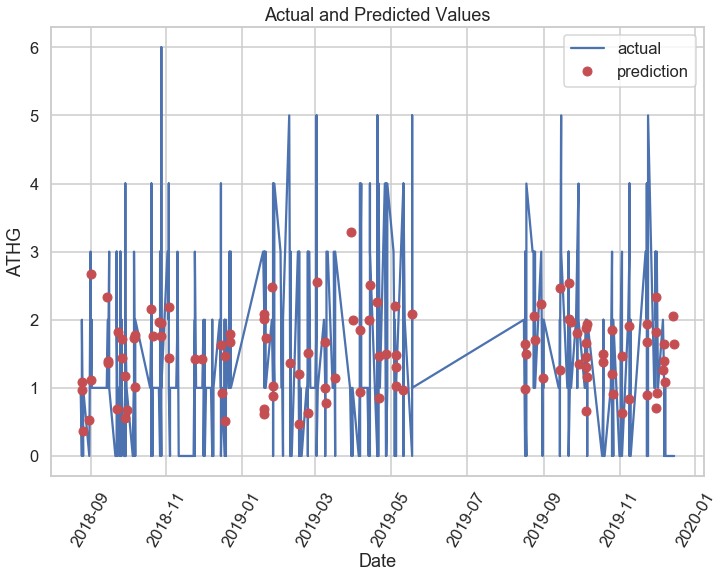

In [40]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('ATHG'); plt.title('Actual and Predicted Values');
